<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1> PREPARACION DE LOS DATOS </h1>
<br>

La preparación de datos en Machine Learning (ML) es el proceso esencial de transformar datos brutos en un formato limpio, organizado y estructurado, listo para ser utilizado por los algoritmos de ML. Este proceso, que incluye recopilación, limpieza, transformación, codificación de variables categóricas, y estandarización, es fundamental para asegurar modelos más precisos, un entrenamiento más rápido y mejores predicciones. 

Por: Deibi Flavio Bastidas Ceron

Presentado a: José Armando Ordoñez Cordoba

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import statistics as stat

In [2]:
# Cargamso el dataset
url = 'bike data.csv'
data = pd.read_csv(url)

In [3]:
# Convertimos el dataset en dataframe
df = pd.DataFrame(data)

In [4]:
# Creamos la variable target y la rellenamos de acuerdo a los valores definidos en la pregunta SMART
# porsentaje de profit >= al 40% es 1 y < al 40% es 0

df['target'] = ((((df['Unit Price']-df['Unit Cost']) /df['Unit Cost']) * 100) >= 40).astype('int')

In [5]:
# Visualizamos las 5 primeras filas del data set
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590,1
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590,1
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366,1
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188,1
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238,1


In [6]:
# Verificamos el numeor total de  filas y columnas
df.shape

(113036, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   year              113036 non-null  int64  
 2   Customer ID       113036 non-null  int64  
 3   Customer Age      113036 non-null  int64  
 4   Age Group         113036 non-null  object 
 5   Customer Gender   113036 non-null  object 
 6   Country           113036 non-null  object 
 7   State             113036 non-null  object 
 8   Product Category  113036 non-null  object 
 9   Sub Category      113036 non-null  object 
 10  Product           113036 non-null  object 
 11  Frame Size        25982 non-null   float64
 12  Order Quantity    113036 non-null  int64  
 13  Unit Cost         113036 non-null  int64  
 14  Unit Price        113036 non-null  int64  
 15  Cost              113036 non-null  int64  
 16  Revenue           11

Nos podemos dar cuenta que existen valores faltantes en la columna "Frame Size"

In [8]:
# Verificamos la cantidad de valores numos en cada variable
df.isnull().sum()

Date                    0
year                    0
Customer ID             0
Customer Age            0
Age Group               0
Customer Gender         0
Country                 0
State                   0
Product Category        0
Sub Category            0
Product                 0
Frame Size          87054
Order Quantity          0
Unit Cost               0
Unit Price              0
Cost                    0
Revenue                 0
Profit                  0
target                  0
dtype: int64

Confirmamos que la variable Frame Size tiene 87054 valores nulos. esto corresponde al 77 % del total de datos de la variable.

In [9]:
df["Frame Size"].describe()

count    25982.000000
mean        47.313063
std          6.860797
min         38.000000
25%         42.000000
50%         46.000000
75%         52.000000
max         62.000000
Name: Frame Size, dtype: float64

La variable "Frame Size" hace referencia a la talla de los marcos de bicicletas que se venden en la tienda. Por ello, no seria adecuado imputar porque el resto de articulos que se venden en las tiendas no tienen la caracteristica que sugiere esta variable. Entonces, se toma la desicion de eliminar la columna. 

In [10]:
# Eliminamos la columna Frame Size
df = df.drop("Frame Size", axis=1)

Buscamos datos duplicados 

In [11]:
# Verificamos las filas duplicadas 
# Verificar cuáles filas son duplicadas
duplicados = df.duplicated()

# Ver el número total de filas duplicadas
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Para ver las filas duplicadas (si quieres visualizarlas)
filas_duplicadas = df[duplicados]
print("\nLas filas duplicadas son:")
filas_duplicadas

Número de filas duplicadas: 1000

Las filas duplicadas son:


,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
1021,12/19/2013,2013,28931,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,531,1245,714,1
1091,9/30/2015,2015,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,40,20,1
1093,10/24/2013,2013,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,16,8,1
1095,10/24/2015,2015,11068,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,8,4,1
1193,1/15/2016,2016,11248,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,28,57,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2/18/2014,2014,26499,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,1482,2336,854,1
111031,2/18/2016,2016,26499,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,1482,2336,854,1
111265,4/27/2014,2014,27295,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,1482,1860,378,1
111953,9/20/2013,2013,29256,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,461,735,274,1


se hace una revision de las filas que aparecen como duplicadas y se confirma que corresponden a la misma venta. 
por tanto, se eliminan

In [12]:
df = df.drop_duplicates()

In [13]:
# Verificamos el numeor total de  filas y columnas
df.shape

(112036, 18)

Se elimina la columna Customer Age ya que existe otra variable que agrupa las edades.
y tambien se elimina Customer ID ya que es una variable que codifica al usuario y no es necesaria en el analisis

In [14]:
# Eliminamos la columna Frame Size
df = df.drop(["Customer Age", "Customer ID"], axis=1)

Se cambia la variable Date que contiene la fecha completa de la compra y se sustituye por una variable "month" que solo tendra el mes. se hace esto porque el año ya lo tenemos en otra variable y el dia de la compra no es importante en el analisis.

In [15]:
# Convertir la columna 'date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extraer el mes como número (1 = enero, 12 = diciembre)
df['month'] = df['Date'].dt.month

# Si ya no quieres conservar la columna original:
df = df.drop(columns=['Date'])

# Reordenamos columnas para que month quede primero
cols = ['month'] + [col for col in df.columns if col != 'month']
df = df[cols]

Se analizarán los valores de la columna Unit Cost 

In [16]:
df["Unit Cost"].describe()

count    112036.000000
mean        267.819603
std         550.218722
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit Cost, dtype: float64

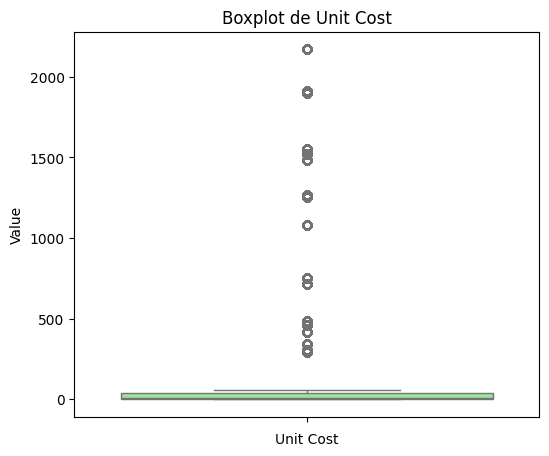

In [17]:
# Boxplot de Unit Cost
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["Unit Cost"], color="lightgreen")
plt.title("Boxplot de Unit Cost")
plt.xlabel("Unit Cost")
plt.ylabel("Value")
plt.show()

Observamos una gran cantidad de outliers en la grafica. se procede a investigar a que corresponden o si son valores 
erroneos.

In [18]:
# Encontrar el índice de la fila con el valor máximo en 'Unit Cost'
indice_maximo = df['Unit Cost'].idxmax()

# Obtener y imprimir la fila completa usando el índice
fila_con_maximo = df.loc[indice_maximo]
print("La fila con el valor máximo en 'Unit Cost' es:")
print(fila_con_maximo)

La fila con el valor máximo en 'Unit Cost' es:
month                              2
year                            2012
Age Group             Adults (35-64)
Customer Gender                    M
Country                United States
State                     Washington
Product Category               Bikes
Sub Category              Road Bikes
Product             Road-150 Red, 48
Order Quantity                     2
Unit Cost                       2171
Unit Price                      3578
Cost                            4342
Revenue                         5582
Profit                          1240
target                             1
Name: 58158, dtype: object


Podemos concluir que los valores atipicos de la variable corresponden a valores de compra de articulos costosos que maneja la tienda como bicicletas. por tal motivo se dejan para el analisis.

Ahora procedemos a separar las variables numericas de las variables categoricas

In [19]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Age Group', 'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category', 'Product'],
      dtype='object')

In [20]:
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features

Index(['month', 'year', 'Order Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue', 'Profit', 'target'],
      dtype='object')

In [21]:
df.head()

,month,year,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
0,11,2013,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,950,590,1
1,11,2015,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,950,590,1
2,3,2014,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2401,1366,1
3,3,2016,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2088,1188,1
4,5,2014,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,418,238,1


Se realiza la codificacion de las variables categoricas 

codificamos de forma ordinal la columna ** Age Group**

In [22]:
age_order = {'-25': 1, '26-35': 2, '36-64': 3, '65+':4 }
df['Age Group'] = df['Age Group'].map(age_order)

Utiliza **One-Hot encoding** para las siguientes variables: "Product Category", "Sub Category" 

In [23]:
df = pd.get_dummies(
    df, columns=["Country",  "State", "Product Category", "Sub Category", "Product"])

CONCLUSIONES:

- La preparacion de los datos es una parte crucial para el anilisis y creacion de modelos de IA. puesto que la toma de malas desiciones, puede causar errores en las prediciones.

- Para la imputacion de datos faltantes y eliminacion de variables, es necesario que el investigador tenga un dominio del tema para poder hacerlo correctamente.

- En cuanto a la codificacion de las variables categoricas, es importante utilizar el mejor metodo para cada una de ellas. y asi, simplificar el modelo.